In [10]:
import numpy as np
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
#########################################################
# Description: Simulate a channel using a digital Butterworth LPF with specified cutoff. This function
#              computes the output of the channel for the given input signal, and also adds AWGN of 
#              specified noise variance
#              
# Usage: y = channel(x,T,dt,fcut,nvar,figvar)
# Inputs: x - Input signal
#         T - Symbol duration  
#         dt - Sampling interval
#         fcut - For the digital Butterworth LPF, the 3-db cutoff is set to fcut*R/(.5 * fs), where R is the
#                symbol rate   
#         nvar - noise variance
#         figvar - If '1', the function will plot the frequency response of the filter, and the 
#                 input and ouput signals
# Output: y - Output signal y = h*x + n.
#########################################################

def channel(x,T,dt,fcut,nvar,figvar):
    fs = 1/dt 
    R = 1/T 
    Wn = fcut*R/(fs/2) 
    if Wn == 0 : 
        y = x + np.sqrt(nvar)*np.random.normal(0,1,x.size) 
    else : 
        b, a = signal.butter(5, Wn) 
        y = signal.lfilter(b, a, x) + np.sqrt(nvar)*np.random.normal(0,1,x.size) 
    if figvar == 1 : 
        f = np.arange(0,fs/2,dt) 
        w, Hf = signal.freqz(b,a,f.size)
        fig1 = plt.figure()
        plt.plot(f,np.abs(Hf))
        plt.grid()
        fig2 = plt.figure()
        plt.plot(x,'-')
        plt.plot(y,'--')
        plt.grid()
    return y 


In [11]:
x = np.array([-1,-1,1,1,1,-1,-1,1,-1,1])
p = np.kron(x,np.ones(10))
T = 1
dt = 0.1
fcut=1
nvar = 0
figvar=1

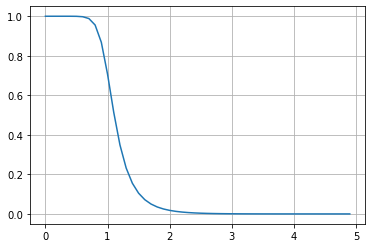

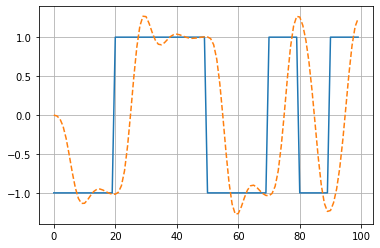

In [12]:
 y = channel(p,T,dt,fcut,nvar,figvar)